# Churn Prediction

Churn refers to the customers who have left the business/using a product of a business and hence are no longer a customer. Statistically it costs 10 times less to sell to an existing customer than to find a new customer.

So retaining customers is and should be of utmost importance. Churn typically indicates whether a customer has left using the product/business. So predicting based on attributes if a customer is likely to leave the business is highly cost effective for the business.

You can download the dataset from here : https://www.kaggle.com/blastchar/telco-customer-churn

This notebook is a demonstration on building a model to predict churn rates.

In [288]:
import pandas as pd

In [289]:
churn = pd.read_csv('/Users/rishabh/Desktop/Kaggle/Customer/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [290]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [291]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [292]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Finding every column with a yes and no :

In [293]:
li = []
for i in churn.columns:
    if len(churn[i].value_counts())==2:
        li.append(i)

In [294]:
li

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

Replacing dual valued columns with binary values :

In [295]:
churn['gender'].replace(['Female','Male'],[0,1],inplace=True)
churn['Partner'].replace(['Yes','No'],[1,0],inplace=True)
churn['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
churn['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
churn['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
churn['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [296]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [297]:
churn.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [298]:
churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [299]:
churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [300]:
churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [301]:
churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [302]:
churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [303]:
churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [304]:
churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [305]:
churn['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [306]:
churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [307]:
churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

For some reasons total charges is str and not float, I'll be converting it to float :

In [308]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [309]:
type(churn['TotalCharges'][0])

numpy.float64

In [310]:
churn['TotalCharges'].mean()

2283.3004408418697

In [311]:
churn['TotalCharges'].isnull().sum()

11

After converting it to float, there was a value either Nan or inf so I'll be substituting that with mean of total charges :

In [312]:
churn['TotalCharges'].fillna(churn['TotalCharges'].mean(),inplace=True)

So there are a lot of columns which I can convert to integer here only but I will perform EDA first to see if the column holds much significance or not

# EDA

In [313]:
import seaborn as sns

In [314]:
%matplotlib inline

In [315]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


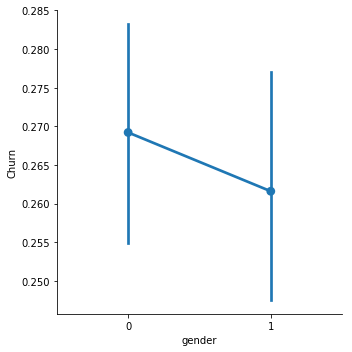

In [316]:
sns.factorplot('gender','Churn',data=churn)

I would say gender is somewhat deterimental about churn as females are more likely to churn from the service than males.

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


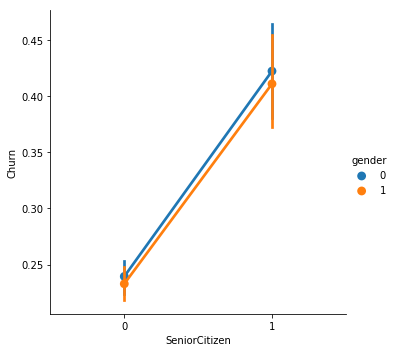

In [317]:
sns.factorplot('SeniorCitizen','Churn',hue='gender',data=churn)

Senior citizens are highly likely to churn as compared to non senior citizens. But there is not much difference between gender and senior citizen combined.

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


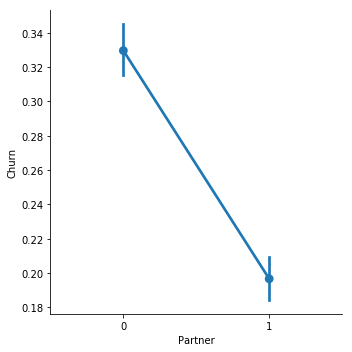

In [318]:
sns.factorplot('Partner','Churn',data=churn)

Having a partner makes it highly unlikely for a person to churn. That's interesting to note, maybe the company was offering combined plans !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


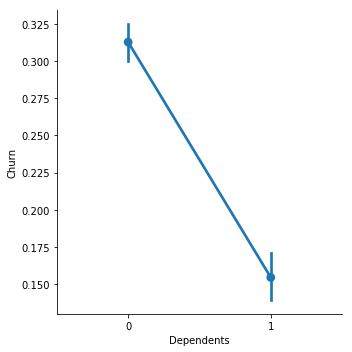

In [319]:
sns.factorplot('Dependents','Churn',data=churn)

This also seems like a highly influential factor.

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


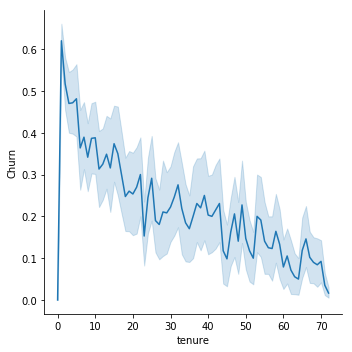

In [320]:
sns.relplot('tenure','Churn',data=churn,kind='line')

Customers who have just joined have higher chances of quitting instead of ones who have been there with the company for some years.

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


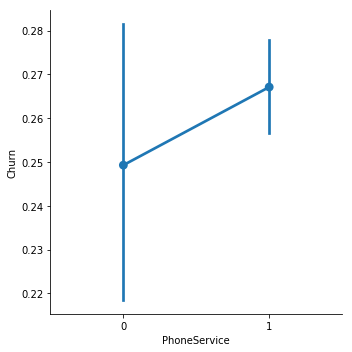

In [321]:
sns.factorplot('PhoneService','Churn',data=churn)

Customer not having a phone service are unlikely to quit though difference is marginal

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


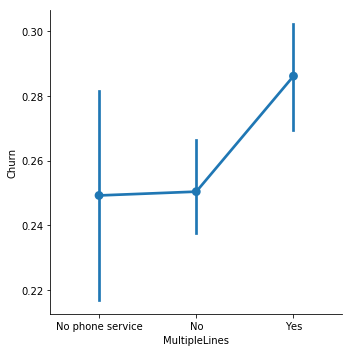

In [322]:
sns.factorplot('MultipleLines','Churn',data=churn)

Having multiple lines put you at the band with customers at higher probability of discontunuing the service. So if the company is providing the service of giving multiple lines, they should take care of such customers more !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


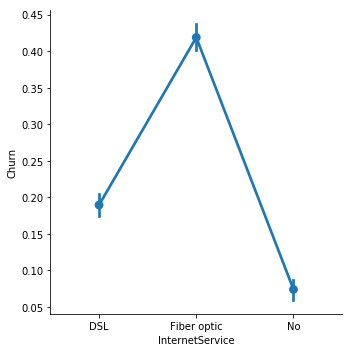

In [323]:
sns.factorplot('InternetService','Churn',data=churn)

The fiber optic service doesn't seem to be working well for the company !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


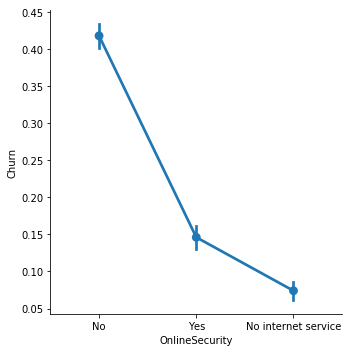

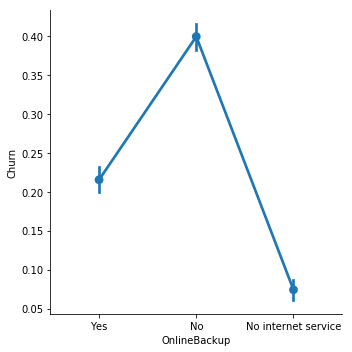

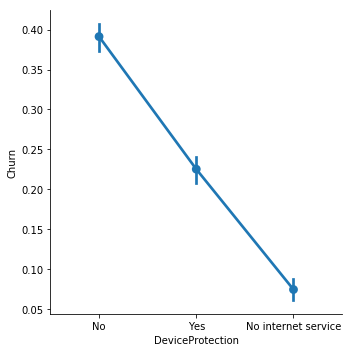

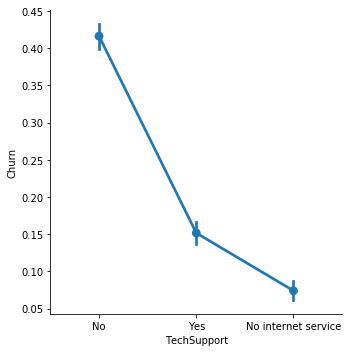

In [324]:
sns.factorplot('OnlineSecurity','Churn',data=churn)
sns.factorplot('OnlineBackup','Churn',data=churn)
sns.factorplot('DeviceProtection','Churn',data=churn)
sns.factorplot('TechSupport','Churn',data=churn)

Providing Online security and backup, Tech support and device protection decreases the chances of churn !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


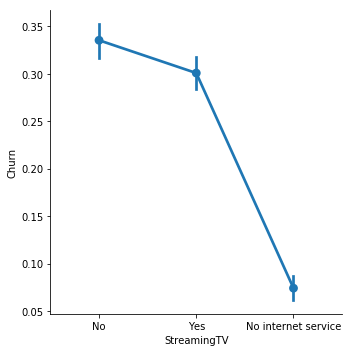

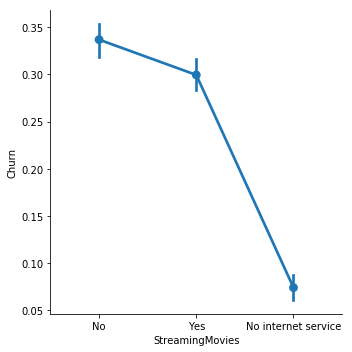

In [325]:
sns.factorplot('StreamingTV','Churn',data=churn)
sns.factorplot('StreamingMovies','Churn',data=churn)

Streaming service may not be as impactful as it can be because as can be seen, even when provided to the users having internet service, streaming service wasn't able to decrease churn rate by a lot. The difference is still visual !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


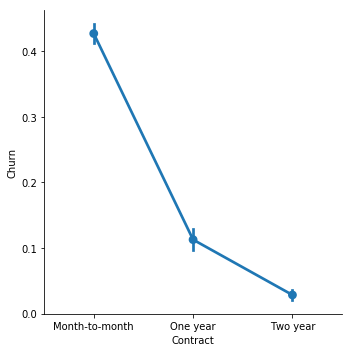

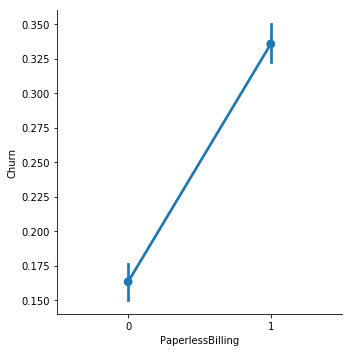

In [326]:
sns.factorplot('Contract','Churn',data=churn)
sns.factorplot('PaperlessBilling','Churn',data=churn)

Having a year or two year contract decreases rate of churn. But having billing by paper decreases churn

This might be because majority of individuals are senior citizens !

In [327]:
churn.groupby(['SeniorCitizen'])['PaperlessBilling'].mean()

SeniorCitizen
0    0.558380
1    0.767075
Name: PaperlessBilling, dtype: float64

My intuition was wrong, senior citizens are more likely to use paperless billing !

In [328]:
import matplotlib.pyplot as plt

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


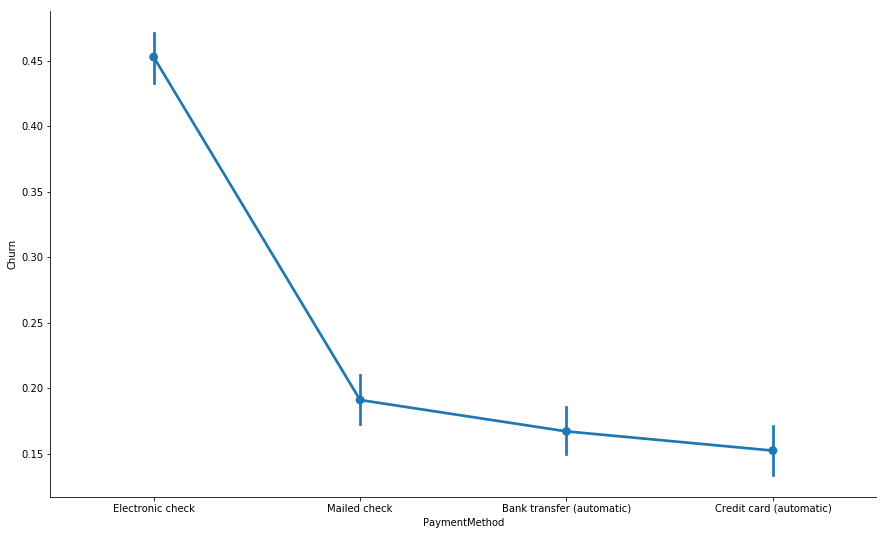

In [329]:
sns.factorplot('PaymentMethod','Churn',data=churn)
f=plt.gcf()
f.set_size_inches(15,8)

Offering discounts on credit card and bank transfer will lead to less churn rates as is evident from the graph above.

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


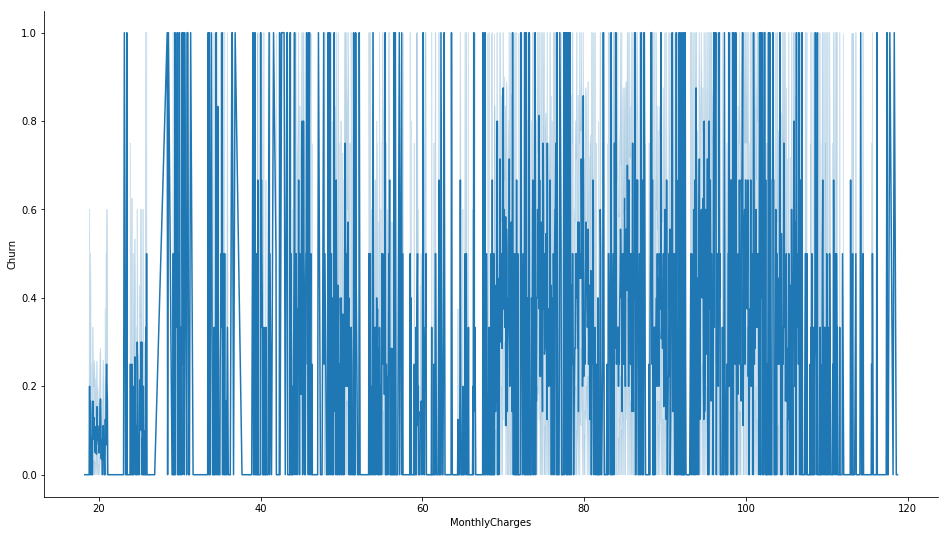

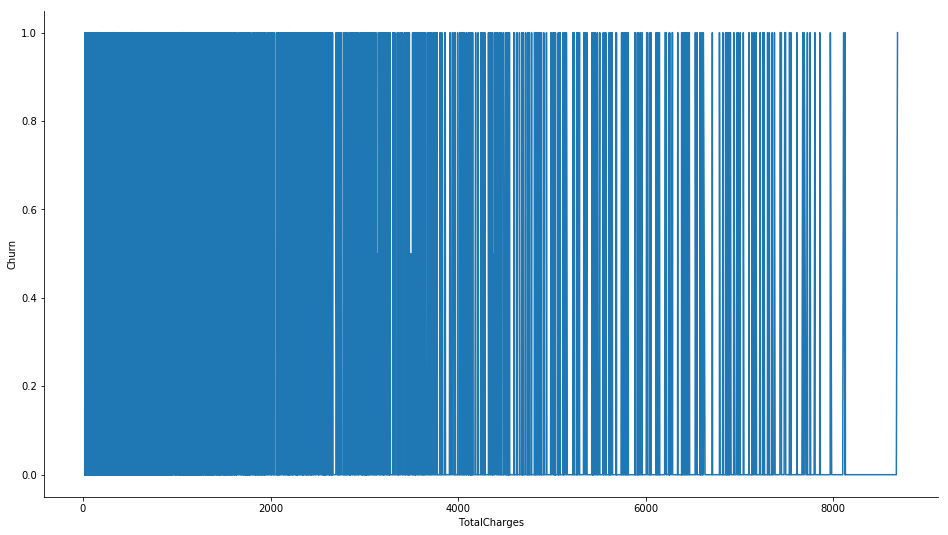

In [330]:
sns.relplot('MonthlyCharges','Churn',data=churn,kind='line')
f=plt.gcf()
f.set_size_inches(15,8)
sns.relplot('TotalCharges','Churn',data=churn,kind='line')
f=plt.gcf()
f.set_size_inches(15,8)

There isn't much information i can see through this way, I will try to make buckets of this continuous data to have a better visualisation.

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


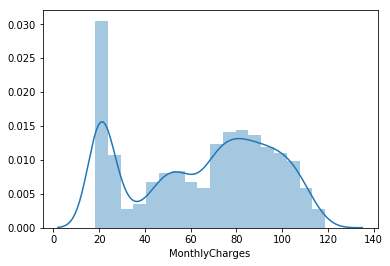

In [331]:
sns.distplot(churn.MonthlyCharges)

In [332]:
churn['MonthlyCharges'] = pd.cut(churn.MonthlyCharges,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [333]:
churn['TotalCharges'] = pd.cut(churn.TotalCharges,10,labels=[1,2,3,4,5,6,7,8,9,10])

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


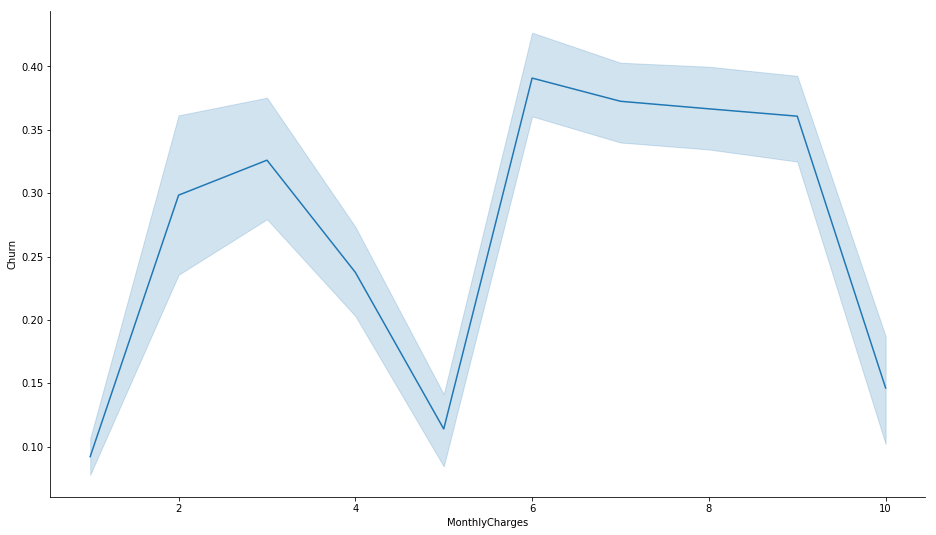

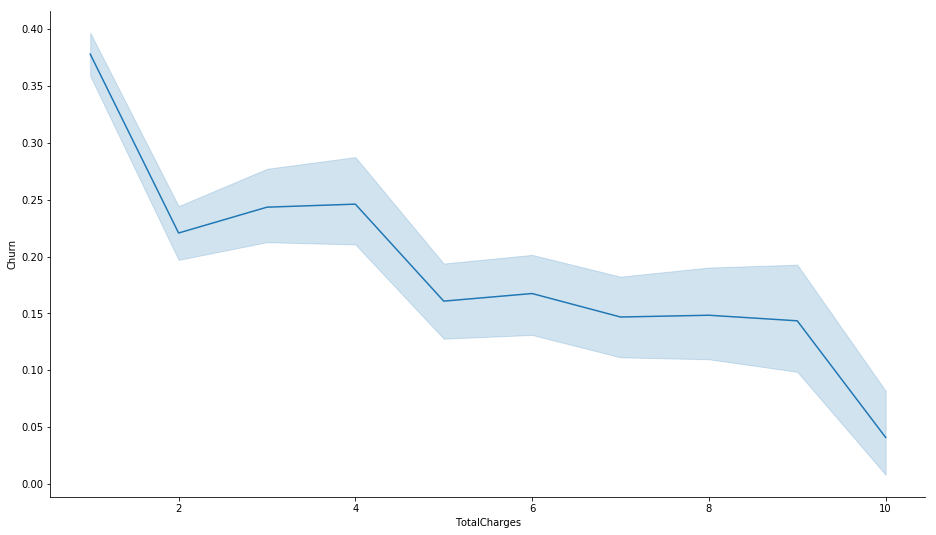

In [334]:
sns.relplot('MonthlyCharges','Churn',data=churn,kind='line')
f=plt.gcf()
f.set_size_inches(15,8)
sns.relplot('TotalCharges','Churn',data=churn,kind='line')
f=plt.gcf()
f.set_size_inches(15,8)

Total charges does seem like a feature we can use since as total amount charged to the customer increases, churn rate decreases. This can be contrary to intuition but this might be due to, people enrolling in yearly contracts rather than monthly and hence not contributing to churn rates.

# Converting categorical features to numeric

In [335]:
churn['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['InternetService'].replace(['Fiber optic','DSL','No'],[2,1,0],inplace=True)
churn['MultipleLines'].replace(['No','Yes','No phone service'],[0,1,2],inplace=True)
churn['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
churn['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
churn['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[1,2,3,4],inplace=True)

# Predictive Analysis

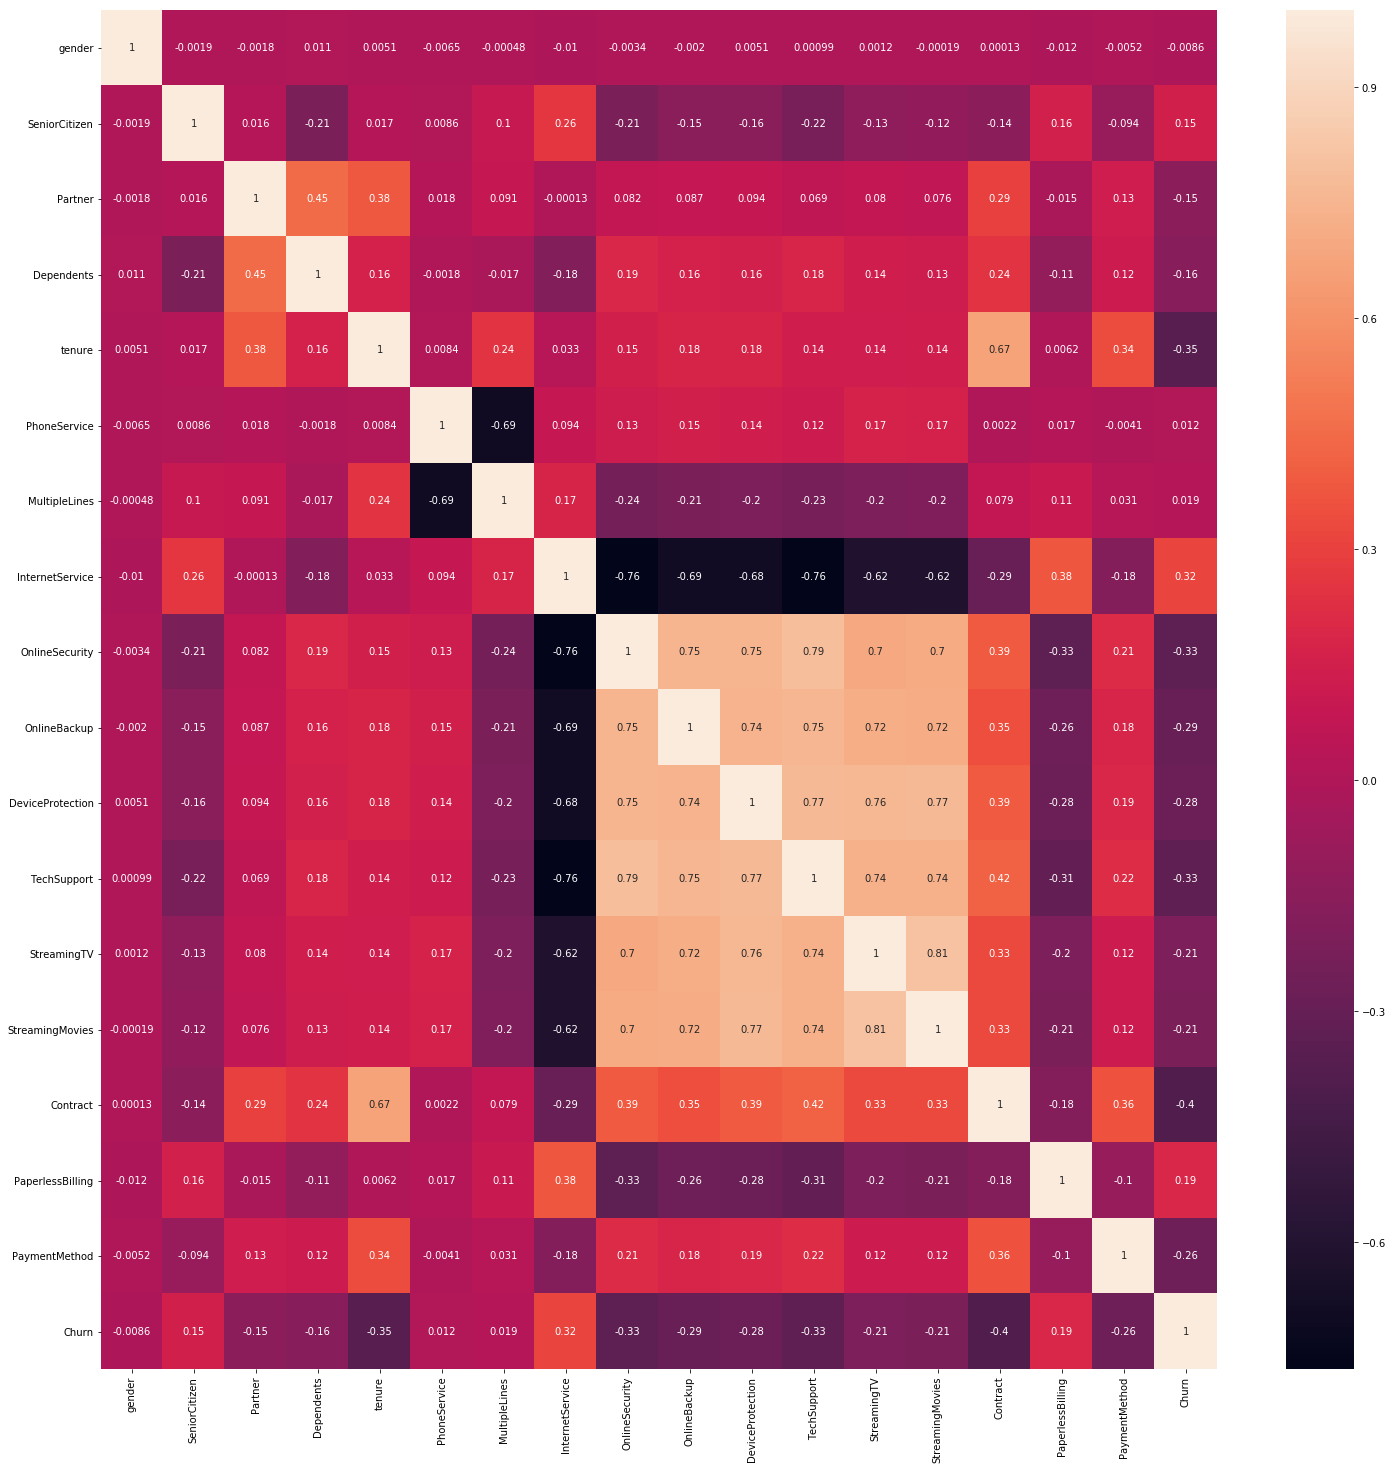

In [336]:
sns.heatmap(churn.corr(),annot=True)
f=plt.gcf()
f.set_size_inches(25,25)

In [338]:
from sklearn.model_selection import train_test_split

In [349]:
x_train,x_test,y_train,y_test = train_test_split(churn.iloc[:,1:-1],churn.iloc[:,-1:],random_state=0)

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
model = LogisticRegression()

In [352]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7967064168086314

In [353]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7018739352640545

In [354]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.7399204997160704

In [355]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.771152754116979

In [356]:
from sklearn import svm
model6 = svm.SVC(kernel='linear')
model6.fit(x_train,y_train)
model6.score(x_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8012492901760363

In [357]:
model7 = svm.SVC(kernel='rbf')
model7.fit(x_train,y_train)
model7.score(x_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7915956842703009

In [358]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=2000,learning_rate=0.1,random_state=0)
ada.fit(x_train,y_train)
print('Adaboost:'+str(ada.score(x_test,y_test)))
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(n_estimators=1000,random_state=0,learning_rate=0.1)
gradient.fit(x_train,y_train)
print('Gradient:'+str(gradient.score(x_test,y_test)))
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier(n_estimators=700,random_state=0)
randomf.fit(x_train,y_train)
print('RandomForest:'+str(randomf.score(x_test,y_test)))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost:0.794434980124929


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient:0.771152754116979


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForest:0.7756956274843839


So in the notebook we were able to develop a predictive model for determining whether a customer is likely to churn or not. As a business, factors which encourage customers to churn should be taken care of by the business. Also there were a lot of insights we found in EDA like :

1. Customers enrolled in longer duration plans are likely to stay
2. Customers using credit cards are likely to stay
3. More technical support should be provided
4. Device protection plan can be offered as default at minimal pay to lure customers
5. Providing online security influences more customers to stay
6. Online backup is also another factor which can be provided at minimal predecided pay
7. Fiber optic service should be improved !

Through the analysis, and results we got above, focus should be given on promoting credit card methods for payment and giving discounts on yearly offers to decrease churn rates.

As always, more the attributes we will have, also more informative the attributes we will have, better the decision making process can be for the business !